In [1]:
import matplotlib.pyplot as plt
import skimage.measure
import numpy as np
import cv2
import PIL

import random
import time

from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
import tensorflow as tf
from tensorflow.keras import regularizers

from q_space import Environment
env = Environment.make_env()

Env: BreakoutNoFrameskip-v4
Obs: Box(210, 160, 3)
Actions: Discrete(4) - ['NOOP', 'FIRE', 'RIGHT', 'LEFT']
Reward range: (-inf, inf)


In [2]:
obs = Environment.reset(env)
obs.shape

(41, 36)

In [4]:
for i in range(640-1):
    act = random.randint(1,3)
    obs, reward, done = Environment.step(env, act)

    if done:
        Environment.reset(env)
    #img1 = PIL.Image.fromarray(obs_g)
    #clear_output(wait=False)
    #display(img1.resize((200,200)))
    #img1.save(f"images/test{i}.png")
    #time.sleep(0.1)
    #clear_output(wait=False)

In [5]:
Environment.close(env)

In [ ]:
in_size = np.prod(Environment.OBS_SHAPE)
encoding_dim = 32
hidden_dim = 64
input_img = Input(shape=(in_size,))
# hidden representation of input
hidden = Dense(hidden_dim, activation='relu', 
    kernel_regularizer=regularizers.L1L2(l1=1e-6, l2=1e-5),
    bias_regularizer=regularizers.L2(1e-5),
    activity_regularizer=regularizers.L2(1e-6))(input_img)
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu',
    kernel_regularizer=regularizers.L1L2(l1=1e-6, l2=1e-5),
    bias_regularizer=regularizers.L2(1e-5),
    activity_regularizer=regularizers.L2(1e-6))(hidden)
# hidden representation of code 
hidden = Dense(hidden_dim, activation='relu',
    kernel_regularizer=regularizers.L1L2(l1=1e-6, l2=1e-5),
    bias_regularizer=regularizers.L2(1e-5),
    activity_regularizer=regularizers.L2(1e-6))(encoded)
# decoded representation of code 
decoded = Dense(in_size, activation='sigmoid',
    kernel_regularizer=regularizers.L1L2(l1=1e-6, l2=1e-5),
    bias_regularizer=regularizers.L2(1e-5),
    activity_regularizer=regularizers.L2(1e-6))(hidden)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)


# This model shows encoded images
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
hidden_layer = autoencoder.layers[-2]
decoder_layer = autoencoder.layers[-1]#from encoding to end
# decoder model
decoder = Model(encoded_input, decoder_layer(hidden_layer(encoded_input)))

In [49]:
in_size = np.prod(Environment.OBS_SHAPE)
encoding_dim = 32
hidden_dim = 64
input_img = Input(shape=(in_size,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code 
decoded = Dense(in_size, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)


# This model shows encoded images
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]#from encoding to end
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [3]:
in_size = np.prod((25,36))
encoding_dim = 32
hidden_dim = 64
input_img = Input(shape=(in_size,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code 
decoded = Dense(in_size, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)


# This model shows encoded images
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]#from encoding to end
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [17]:
in_size = np.prod((23,36))
encoding_dim = 32
hidden_dim = 64
input_img = Input(shape=(in_size,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code 
decoded = Dense(in_size, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)


# This model shows encoded images
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]#from encoding to end
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [18]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
batch_size = 32
train_ds = tf.keras.utils.image_dataset_from_directory(
  "./images",
  validation_split=0.5,
  subset="training",
  seed=123,
  image_size=Environment.OBS_SHAPE,
  color_mode='grayscale',
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  "./images",
  validation_split=0.5,
  subset="validation",
  seed=123,
  image_size=Environment.OBS_SHAPE,
  color_mode='grayscale',
  batch_size=batch_size)

normalization_layer = tf.keras.layers.Rescaling(1./255)

def change_inputs(images, labels):
    x = normalization_layer(images)
    #x = tf.image.resize(x, [28, 28], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    #x = x.reshape(np.prod(x.shape))
    print(x.shape)
    batch = x.shape[0] if x.shape[0] else batch_size
    x = tf.reshape(x, [batch,in_size])
    return x, x

normalized_ds = train_ds.map(change_inputs)
normalized_val_ds = val_ds.map(change_inputs)


In [9]:
batch_size = 32
train_ds = tf.keras.utils.image_dataset_from_directory(
  "./images",
  validation_split=0.5,
  subset="training",
  seed=123,
  image_size=Environment.OBS_SHAPE,
  color_mode='grayscale',
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  "./images",
  validation_split=0.5,
  subset="validation",
  seed=123,
  image_size=Environment.OBS_SHAPE,
  color_mode='grayscale',
  batch_size=batch_size)

normalization_layer = tf.keras.layers.Rescaling(1./255)

def change_inputs(images, labels):
    x = normalization_layer(images)
    #x = tf.image.resize(x, [28, 28], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    #x = x.reshape(np.prod(x.shape))
    print(x.shape)
    x = tf.image.crop_to_bounding_box(
        x, 16, 0, 41-16, 36
    )
    batch = x.shape[0] if x.shape[0] else batch_size
    x = tf.reshape(x, [batch,in_size])
    print(x.shape)
    return x, x

normalized_ds = train_ds.map(change_inputs)
normalized_val_ds = val_ds.map(change_inputs)


Found 640 files belonging to 1 classes.
Using 320 files for training.
Found 640 files belonging to 1 classes.
Using 320 files for validation.
(None, 41, 36, 1)
(32, 900)
(None, 41, 36, 1)
(32, 900)


In [19]:
batch_size = 32
train_ds = tf.keras.utils.image_dataset_from_directory(
  "./images",
  validation_split=0.5,
  subset="training",
  seed=123,
  image_size=Environment.OBS_SHAPE,
  color_mode='grayscale',
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  "./images",
  validation_split=0.5,
  subset="validation",
  seed=123,
  image_size=Environment.OBS_SHAPE,
  color_mode='grayscale',
  batch_size=batch_size)

normalization_layer = tf.keras.layers.Rescaling(1./255)

def change_inputs(images, labels):
    x = normalization_layer(images)
    #x = tf.image.resize(x, [28, 28], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    #x = x.reshape(np.prod(x.shape))
    print(x.shape)
    x = tf.image.crop_to_bounding_box(
        x, 16, 0, 41-16-2, 36
    )
    batch = x.shape[0] if x.shape[0] else batch_size
    x = tf.reshape(x, [batch,in_size])
    print(x.shape)
    return x, x

normalized_ds = train_ds.map(change_inputs)
normalized_val_ds = val_ds.map(change_inputs)


Found 640 files belonging to 1 classes.
Using 320 files for training.
Found 640 files belonging to 1 classes.
Using 320 files for validation.
(None, 41, 36, 1)
(32, 828)
(None, 41, 36, 1)
(32, 828)


In [20]:
autoencoder.fit(normalized_ds,
                epochs=500,
                batch_size=256,
                validation_data=normalized_val_ds)

Epoch 1/500
10/10 [==============================] - 1s 32ms/step - loss: 0.6896 - val_loss: 0.6845
Epoch 2/500
10/10 [==============================] - 0s 19ms/step - loss: 0.6792 - val_loss: 0.6727
Epoch 3/500
10/10 [==============================] - 0s 21ms/step - loss: 0.6648 - val_loss: 0.6559
Epoch 4/500
10/10 [==============================] - 0s 17ms/step - loss: 0.6436 - val_loss: 0.6322
Epoch 5/500
10/10 [==============================] - 0s 18ms/step - loss: 0.6142 - val_loss: 0.5999
Epoch 6/500
10/10 [==============================] - 0s 19ms/step - loss: 0.5750 - val_loss: 0.5587
Epoch 7/500
10/10 [==============================] - 0s 19ms/step - loss: 0.5266 - val_loss: 0.5090
Epoch 8/500
10/10 [==============================] - 0s 18ms/step - loss: 0.4708 - val_loss: 0.4536
Epoch 9/500
10/10 [==============================] - 0s 19ms/step - loss: 0.4115 - val_loss: 0.3962
Epoch 10/500
10/10 [==============================] - 0s 18ms/step - loss: 0.3523 - val_loss: 0.3406

KeyboardInterrupt: 

In [10]:
autoencoder.fit(normalized_ds,
                epochs=500,
                batch_size=256,
                validation_data=normalized_val_ds)

Epoch 1/500
10/10 [==============================] - 0s 35ms/step - loss: 0.6108 - val_loss: 0.5722
Epoch 2/500
10/10 [==============================] - 0s 20ms/step - loss: 0.5251 - val_loss: 0.4709
Epoch 3/500
10/10 [==============================] - 0s 18ms/step - loss: 0.4108 - val_loss: 0.3523
Epoch 4/500
10/10 [==============================] - 0s 17ms/step - loss: 0.2938 - val_loss: 0.2458
Epoch 5/500
10/10 [==============================] - 0s 17ms/step - loss: 0.2005 - val_loss: 0.1700
Epoch 6/500
10/10 [==============================] - 0s 17ms/step - loss: 0.1396 - val_loss: 0.1240
Epoch 7/500
10/10 [==============================] - 0s 18ms/step - loss: 0.1047 - val_loss: 0.0970
Epoch 8/500
10/10 [==============================] - 0s 17ms/step - loss: 0.0844 - val_loss: 0.0810
Epoch 9/500
10/10 [==============================] - 0s 16ms/step - loss: 0.0724 - val_loss: 0.0710
Epoch 10/500
10/10 [==============================] - 0s 17ms/step - loss: 0.0648 - val_loss: 0.0644

In [53]:
autoencoder.fit(normalized_ds,
                epochs=500,
                batch_size=256,
                validation_data=normalized_val_ds)

Epoch 1/500
10/10 [==============================] - 1s 50ms/step - loss: 0.6249 - val_loss: 0.4322
Epoch 2/500
10/10 [==============================] - 0s 22ms/step - loss: 0.2283 - val_loss: 0.0694
Epoch 3/500
10/10 [==============================] - 0s 22ms/step - loss: 0.0556 - val_loss: 0.0490
Epoch 4/500
10/10 [==============================] - 0s 25ms/step - loss: 0.0490 - val_loss: 0.0480
Epoch 5/500
10/10 [==============================] - 0s 23ms/step - loss: 0.0461 - val_loss: 0.0443
Epoch 6/500
10/10 [==============================] - 0s 23ms/step - loss: 0.0425 - val_loss: 0.0411
Epoch 7/500
10/10 [==============================] - 0s 23ms/step - loss: 0.0398 - val_loss: 0.0392
Epoch 8/500
10/10 [==============================] - 0s 23ms/step - loss: 0.0384 - val_loss: 0.0382
Epoch 9/500
10/10 [==============================] - 0s 25ms/step - loss: 0.0377 - val_loss: 0.0375
Epoch 10/500
10/10 [==============================] - 0s 23ms/step - loss: 0.0372 - val_loss: 0.0371

In [14]:
autoencoder.save("logs/models/autoencoder_1")

INFO:tensorflow:Assets written to: logs/models/autoencoder_1\assets


In [60]:
for ee in e:
    print(ee)

0.0
1.471508
0.0
2.258195
0.000615067
0.0
0.70865893
0.46880463
0.0
0.0
0.0011120277
0.0015176319
0.0
1.2290741
4.8977304
0.0
1.3453879
0.0014529423
3.324025
0.0
2.1114442
0.00023799244
2.1275024
6.7125835
0.50608027
9.836759
0.0
7.9714155
0.0
1.7963243
0.0
4.594007


1/1 [==============================] - 0s 44ms/step


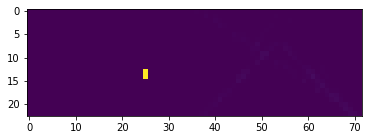

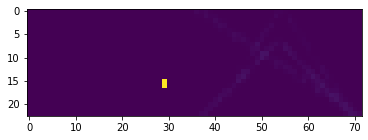

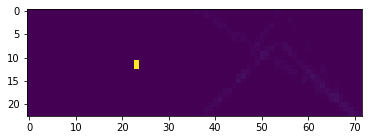

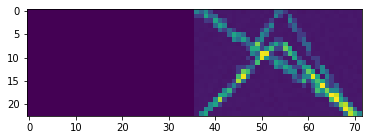

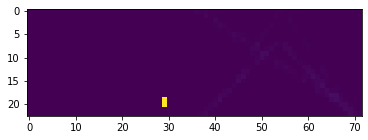

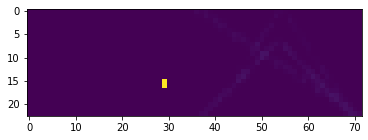

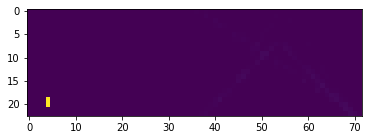

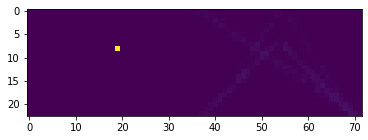

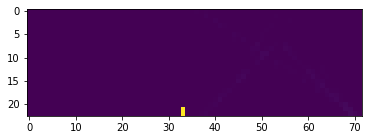

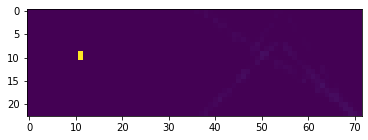

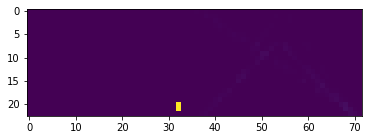

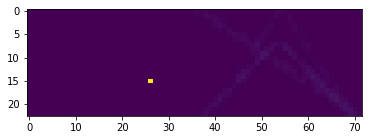

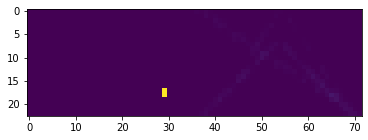

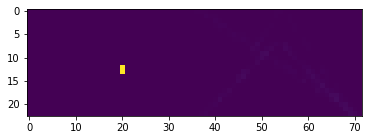

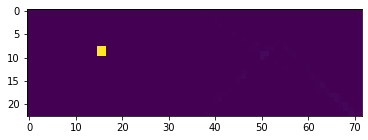

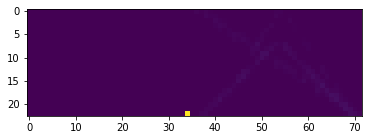

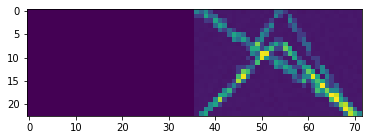

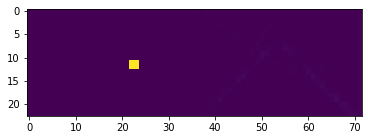

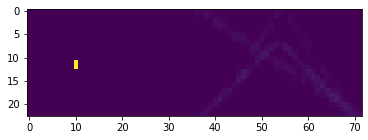

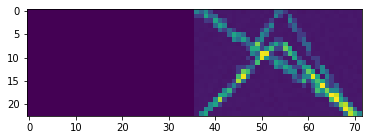

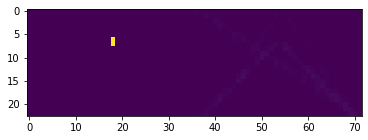

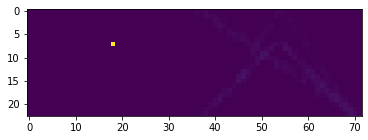

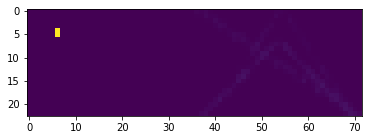

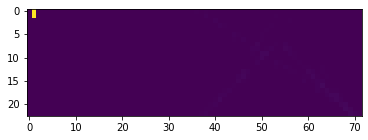

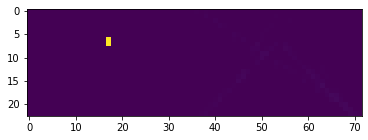

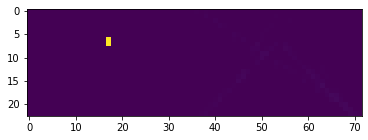

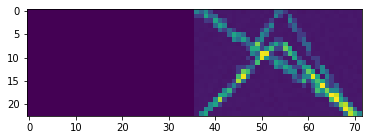

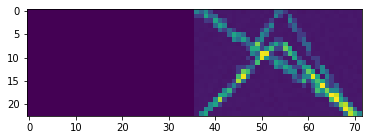

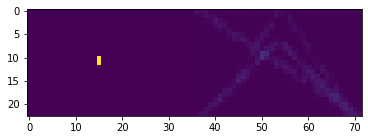

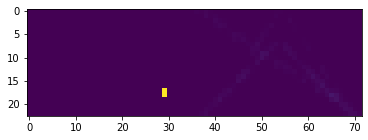

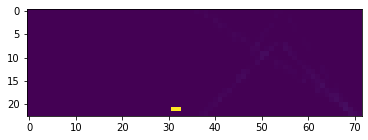

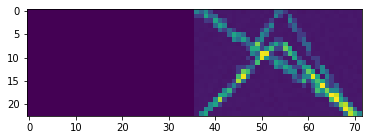

In [21]:
# Crop - 2
from IPython.display import display, clear_output
for image in normalized_val_ds.take(1):
    x_test,_ = image
    encoded_img = encoder.predict(x_test)
    decoded_img = decoder.predict(encoded_img)
    for x, e, d in zip(x_test, encoded_img, decoded_img):
        #print(x.shape)
        x = np.reshape(x,(23,36,1))
        #plt.imshow(x)
        #print(x.shape)
        #print(d.shape)
        d = np.reshape(d,(23,36,1))
        #print(d.shape)
        #plt.imshow(d)
        plt.imshow(np.hstack((x,d)))
        plt.pause(1)
plt.show()

1/1 [==============================] - 0s 42ms/step


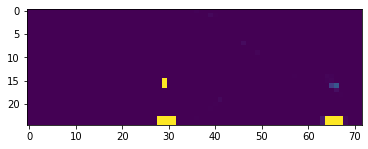

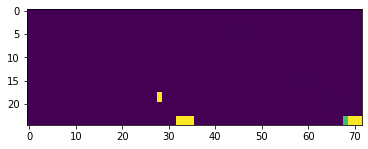

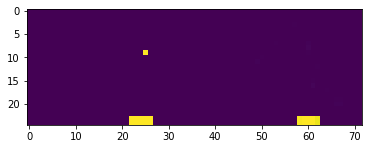

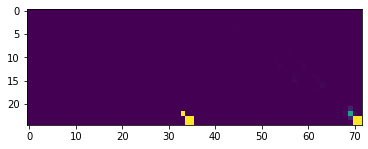

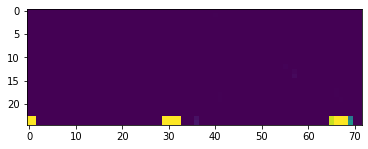

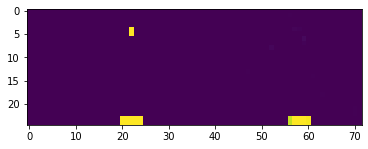

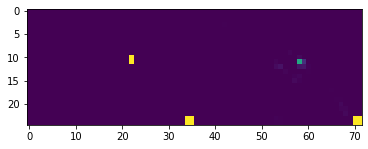

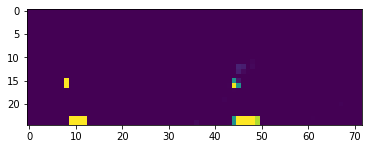

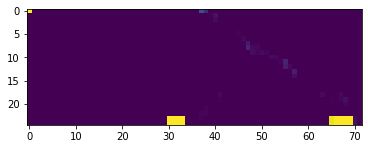

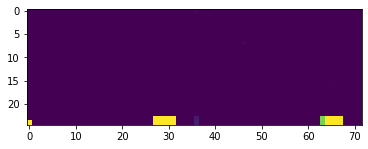

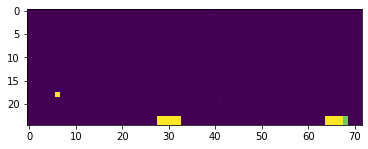

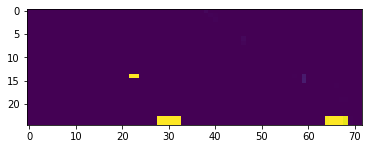

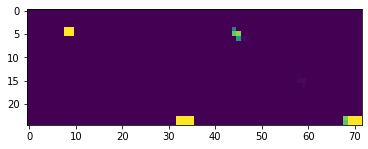

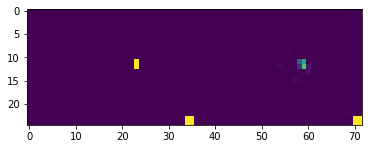

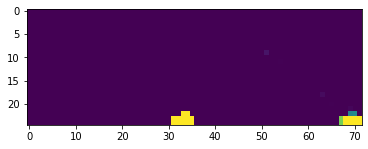

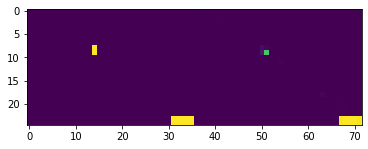

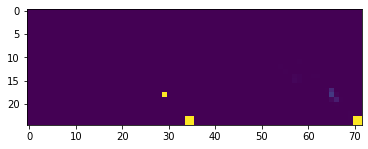

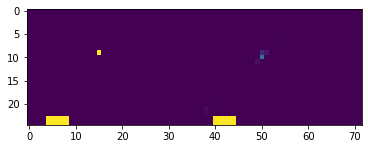

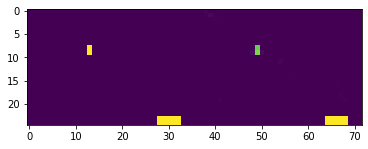

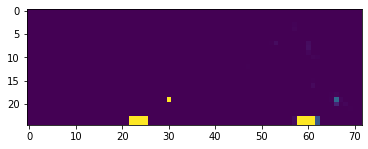

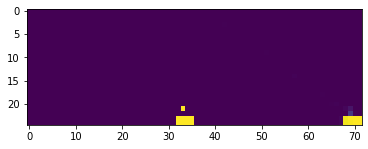

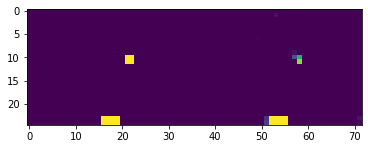

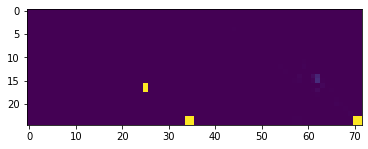

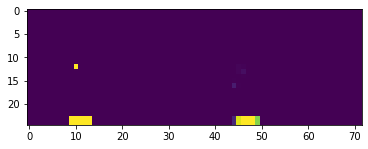

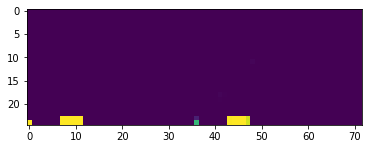

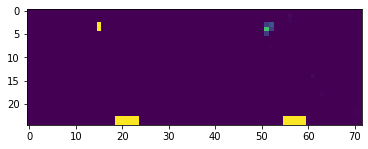

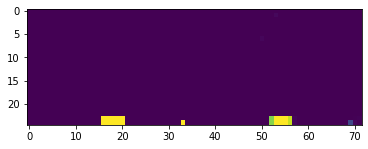

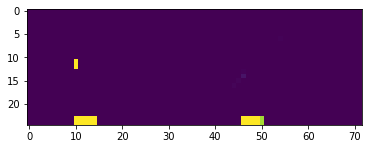

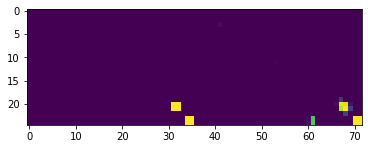

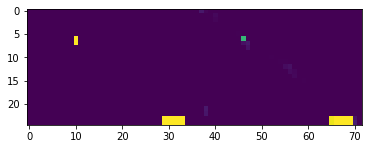

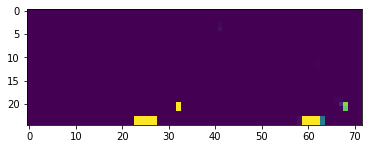

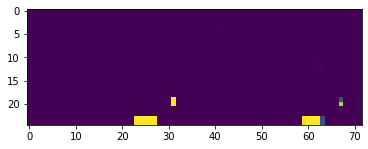

In [11]:
# Crop - 1
from IPython.display import display, clear_output
for image in normalized_val_ds.take(1):
    x_test,_ = image
    encoded_img = encoder.predict(x_test)
    decoded_img = decoder.predict(encoded_img)
    for x, e, d in zip(x_test, encoded_img, decoded_img):
        #print(x.shape)
        x = np.reshape(x,(25,36,1))
        #plt.imshow(x)
        #print(x.shape)
        #print(d.shape)
        d = np.reshape(d,(25,36,1))
        #print(d.shape)
        #plt.imshow(d)
        plt.imshow(np.hstack((x,d)))
        plt.pause(1)
plt.show()

1/1 [==============================] - 0s 57ms/step


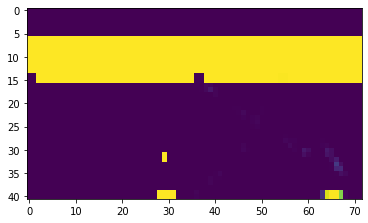

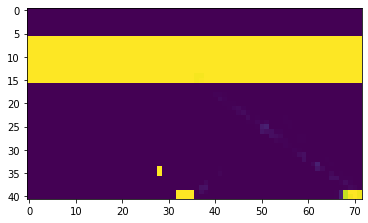

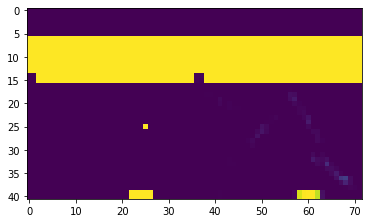

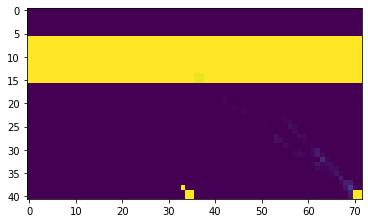

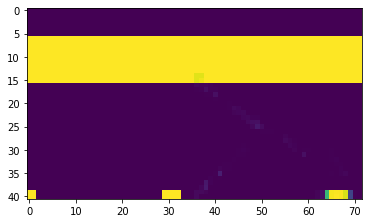

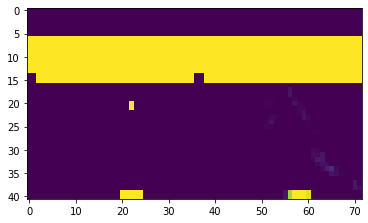

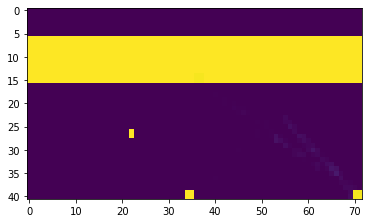

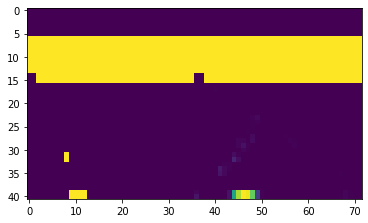

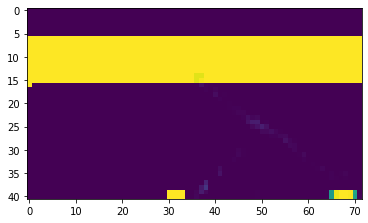

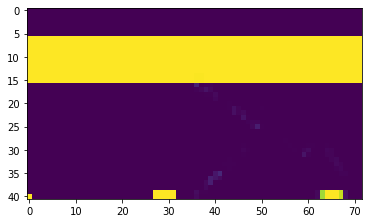

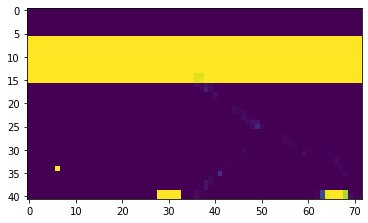

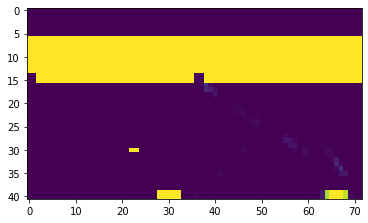

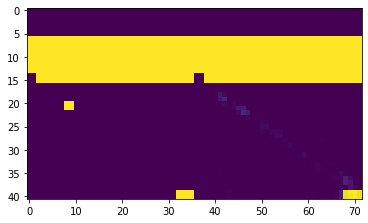

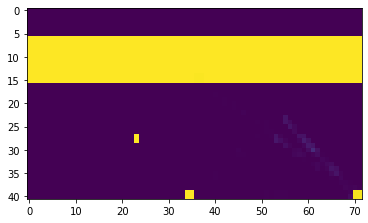

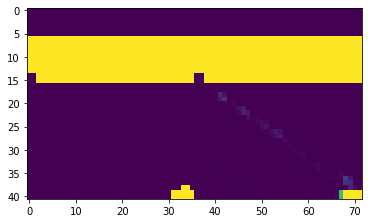

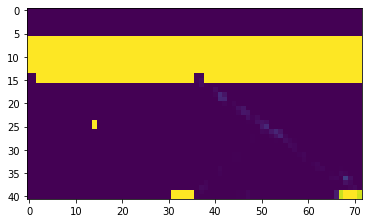

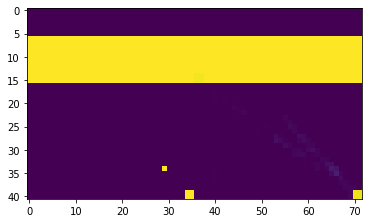

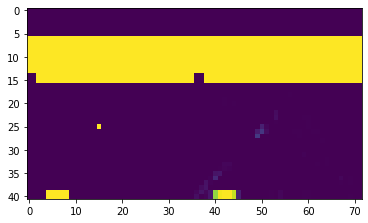

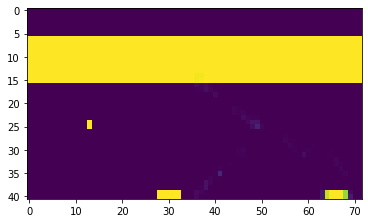

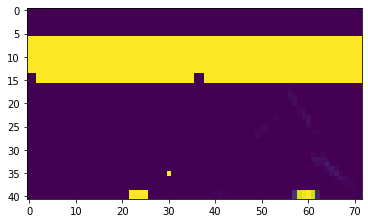

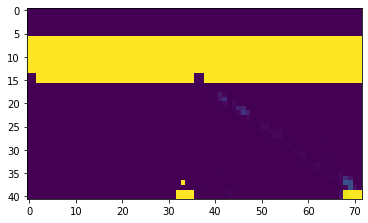

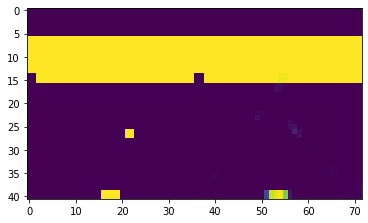

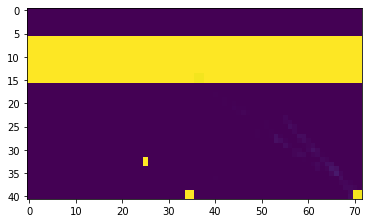

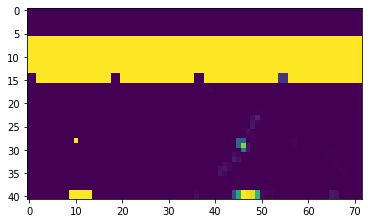

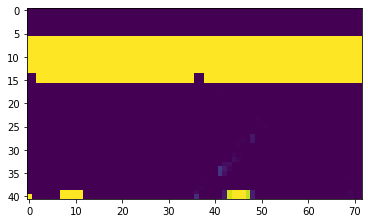

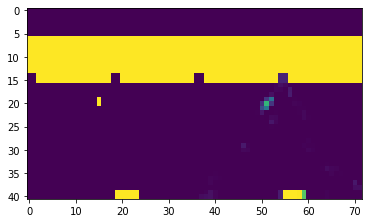

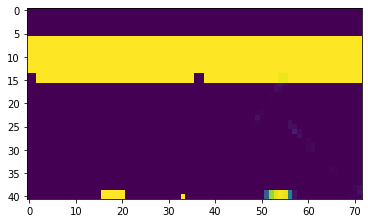

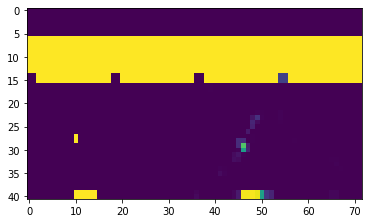

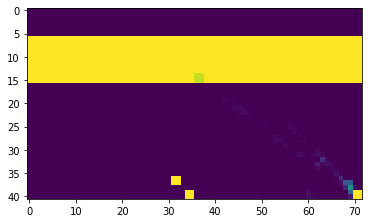

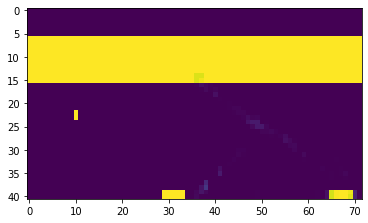

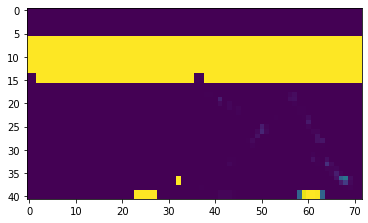

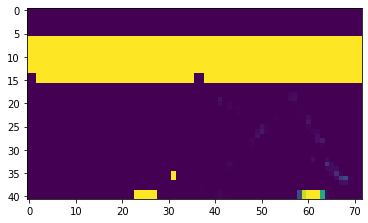

In [54]:
# Hidden Layer
from IPython.display import display, clear_output
for image in normalized_val_ds.take(1):
    x_test,_ = image
    encoded_img = encoder.predict(x_test)
    decoded_img = decoder.predict(encoded_img)
    for x, e, d in zip(x_test, encoded_img, decoded_img):
        #print(x.shape)
        x = np.reshape(x,(41,36,1))
        #plt.imshow(x)
        #print(x.shape)
        #print(d.shape)
        d = np.reshape(d,(41,36,1))
        #print(d.shape)
        #plt.imshow(d)
        plt.imshow(np.hstack((x,d)))
        plt.pause(1)
plt.show()

1/1 [==============================] - 0s 53ms/step


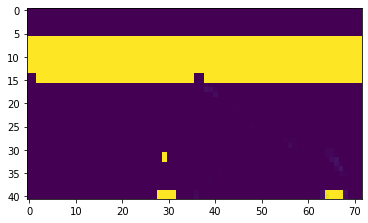

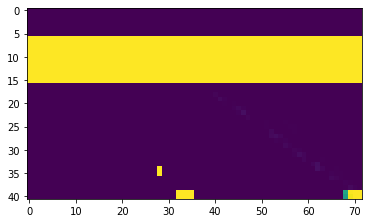

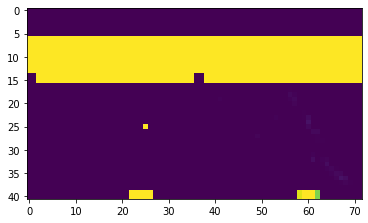

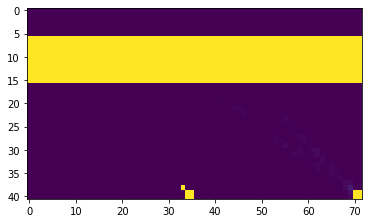

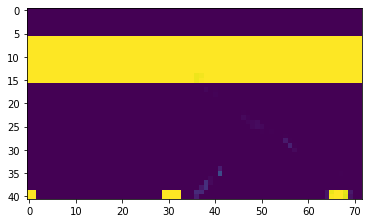

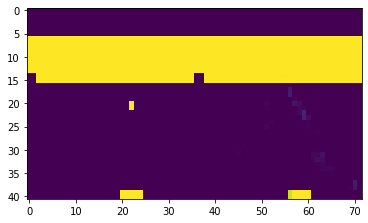

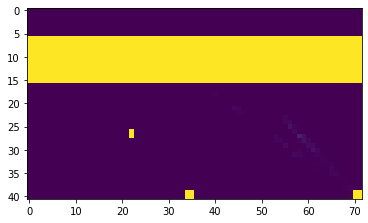

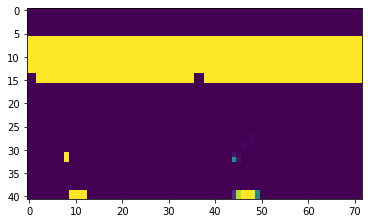

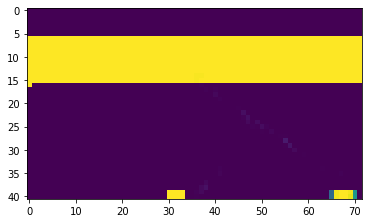

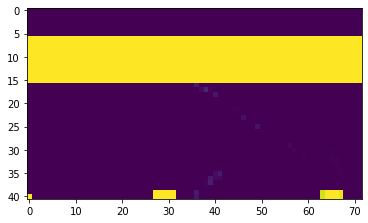

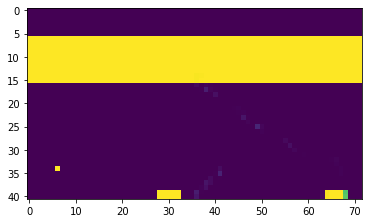

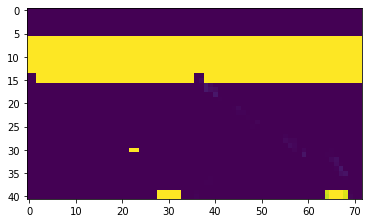

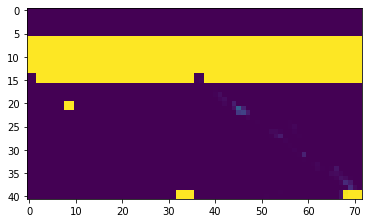

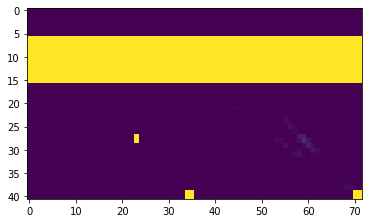

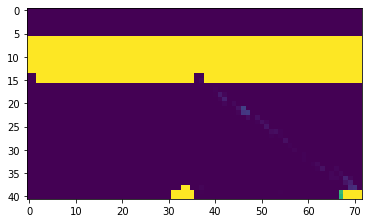

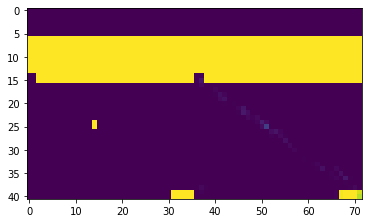

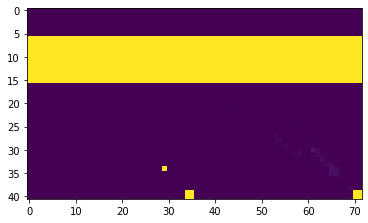

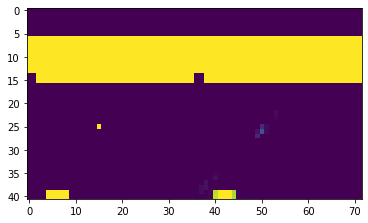

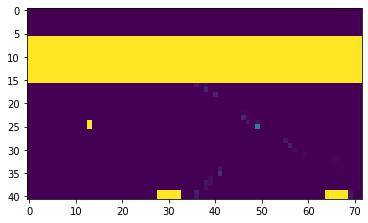

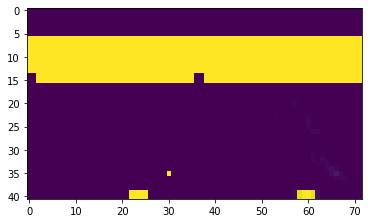

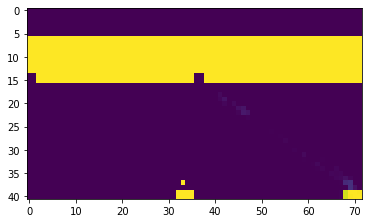

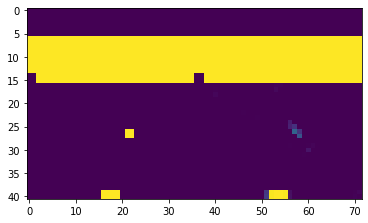

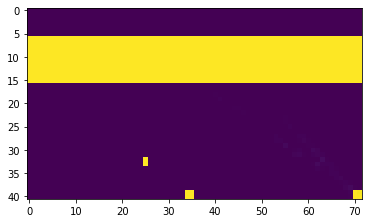

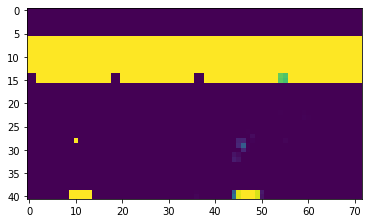

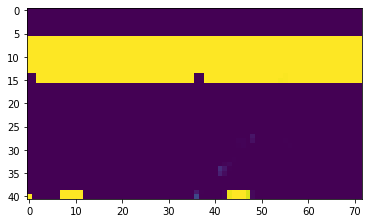

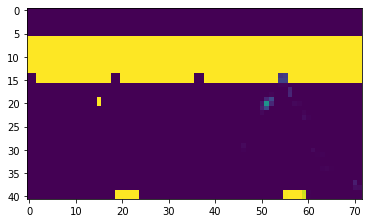

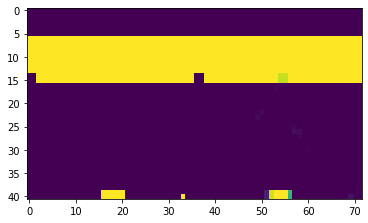

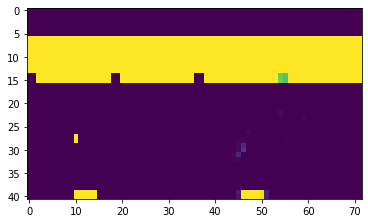

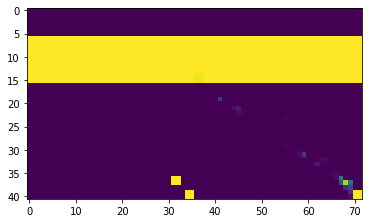

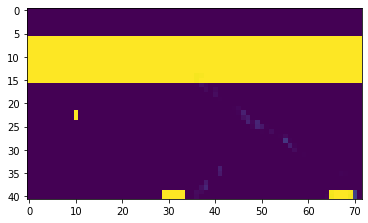

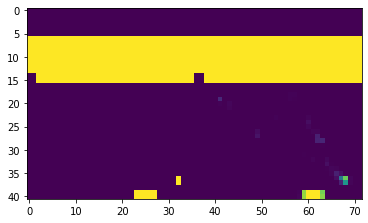

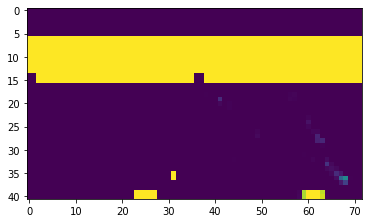

In [15]:
from IPython.display import display, clear_output
for image in normalized_val_ds.take(1):
    x_test,_ = image
    encoded_img = encoder.predict(x_test)
    decoded_img = decoder.predict(encoded_img)
    for x, e, d in zip(x_test, encoded_img, decoded_img):
        #print(x.shape)
        x = np.reshape(x,(41,36,1))
        #plt.imshow(x)
        #print(x.shape)
        #print(d.shape)
        d = np.reshape(d,(41,36,1))
        #print(d.shape)
        #plt.imshow(d)
        plt.imshow(np.hstack((x,d)))
        plt.pause(1)
plt.show()